# 순방향 신경망

## 순방향 신경망의 구조와 설계 항목

### 순방향 신경망

- 정의: 다층 퍼셉트론(인공뉴런)으로 불림

- 가정: 데이터 구조에 특별한 가정사항이 없기에 서로 독립되어있다.

- 특징: 

    - 데이터가 한 방향으로만 흐름
   
    - 출력 데이터가 다시 입력되는 피드백 연결을 가지므로 순환이 있는 그래프 구조.


- 구조: 뉴런들이 계층(layer)쌓아서 이루는 전체 신경망 구조

 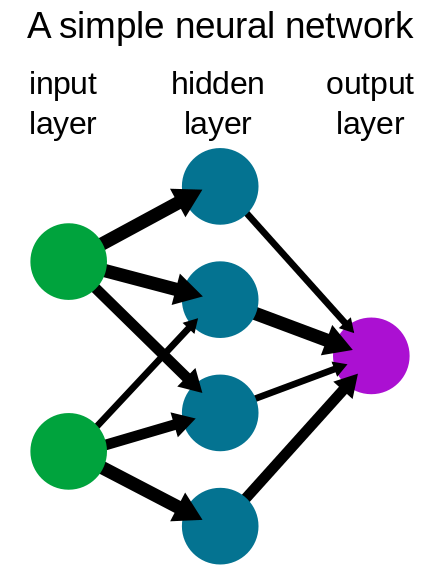
 

1. 입력 계층

    - 외부에서 데이터를 전달 받는다.
    
    - 하나씩 있음
    
2. 은닉 계층

    - 데이터의 특징 추출
    
    - 모델 복잡도에 따라 가변적 구성

3. 출력 계층

    - 추론한 결과를 외부에 출력
    
    - 하나씩 있음
    

4. 완전 연결 계층(fully connected layer)

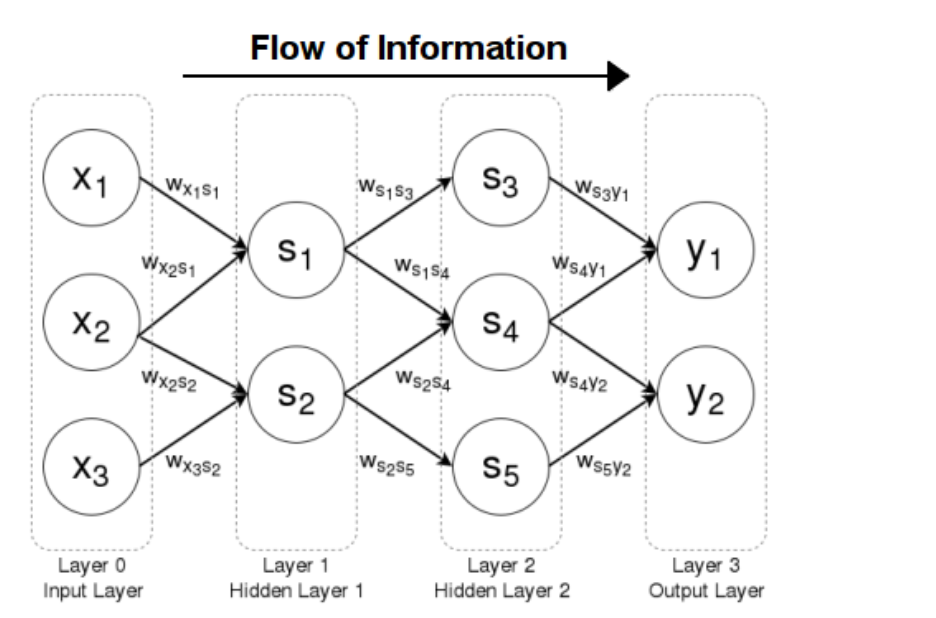

- 정의: 계층에 속한 각 뉴런이 이전 계층의 모든 뉴런과 모두 연결된 구조

- 특징:
     
     - 순방향 신경망의 모든 계층이 구성된 방식
     
     - 이전 층에서 출력 데이터를 동일하게 받기에 같은 입력데이터에서 뉴런마다 서로 다른 특징 추출
     
     - 특징이 많을 수록 비례하여 뉴런 수가 늘어나야 데이터 추출 가능
     
     - 추출된 특징은 계층 단위로 출력하여 다음 계층으로 이동
     

### 특징을 추출하는 뉴런 구조

- 뉴런이 데이터에 내재한 특징 추출.

  *조건
      
   - 가중 합산 실행
       
        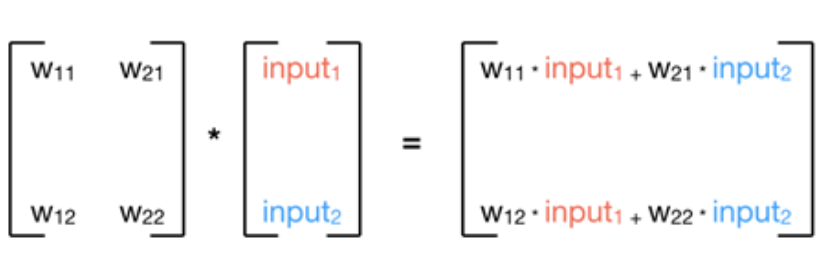
        
       - 입력데이터 x^T = (x1,x2,....,xn) -> 가중치 w^T = (w1,w2,...,wn) 곱해서 합산(벡터화)
      
       - 활성화 함수에 적용하기 위해서는 행렬 곱이 필요
       
       - 가중치: 특징을 추출할 때 영향이 큰 데이터를 선택하는 기준이 된다.
       
       - b: 공간상 임의의 위치 표현
       
       - b=0, 원점을 지나는 연속함수됨
       
       - b !=0, 공간의 어느 위치에든지 존재할 수 있게 함(오프셋 지정)
       
   
   - 활성 함수 실행(by 비선형 변환)
      
       - ReLU
       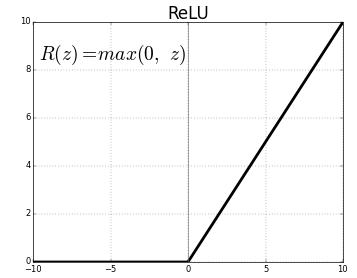
           - 기본  활성 함수
           
           - 경첩 형태의 비선형 함수(문 여닫이 느낌)
           
           - 구간 선형 함수
           
           - 입력값 > 0 : 그대로 출력
           
           - 입력값 <= 0 : 0을 출력
           
 
 Cf, 
 
 - 데이터 비선형 변환 시 원하는 형태의 데이터 추출 가능해짐
 
 - layer을 쌓아서 합성을 하여 여러 특징 표현(복잡한 연속함수, 결정 경계)
 
 - 뉴런의 활성함수는 신경망의 기저함수(신경망을 표현하기 위해 가장 기초적인 함수)
 
 
### 범용 함수 근사기로서의 신경망

*build up

- 뉴런은 가중 합산과 활성 함수를 순차 실행하는 합성 함수이고 계층 또한 합성함수이다

- 신경망 또한 합성함수

####  어떤 형태 정의

- 뉴런은 실함수로, 계층과 신경망은 벡터 함수로 정의.

1. 실함수와 벡터 함수

- 실함수(일대일 대응 함수)

   - f : R^n -> R형태 함수
   
   - 입력: 크기가 n인 벡터 x^T = (x1,x2,...,xn)
   
   - 출력: 실수로 정의 f(x) = f(x1,x2,x3,..,xn)
   
 - 벡터 함수
 
   - f: R^n -> R^m 형태 함수
   
   - 입력: 크기가 n인 벡터 x^T = (x1,x2,...,xn)
   
   - 출력: 크기가 m인 벡터 f(x) = (f1(x),f2(x),....,fm(x))
   

2. 실함수인 뉴런

    - 입력: x^T = (x1,x2,...,xn)
    
    - 가중치: w^T = (w1,w2,...,wn)
    
    - 가중합산: w^T * x + b
    
    - 비선형 함수로 매핑해서 실수 출력
    
    : f(x) = activation(w^T * x + b)


3. 벡터 함수인 계층   

    - 입력: 벡터, 크기는 이전 계층의 뉴런 수와 같다. 크기:n
    
    - 출력: 벡터, 현재 계층의 뉴런 수와 같다. 크기: m
    
    - 계층의 가중치 크기: n * m인 행렬 W로 정의됨. 가중치의 행렬의 각 열은 각 뉴런의 가중치
    
    - 계층의 가중 합산은: 가중치 행렬가 곱의 형태로 정의되고 크기가 m인 벡터가 계산됨
    
    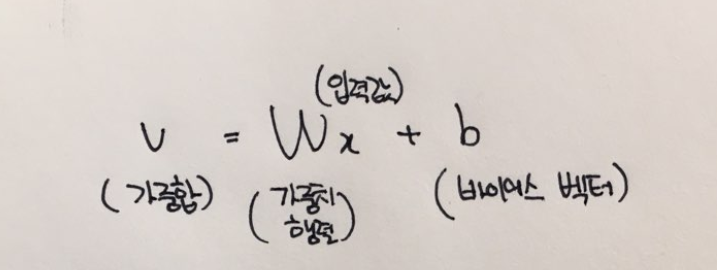
    
    - 결과를 합성 함수에 실행 -> 요소별 활성함수 실행 -> 크기가 m인 벡터 출력
    
     : f(x) =(f1(x),f2(x),...,fm(x))= activation(W^T * x + b)
     

4. 벡터 함수들의 합성 함수인 신경망

- 신경망은 입력 과 출력이 벡터인 벡터함수이자 각 계층이 정의하는 벡터함수를 순차적 실행시키는 합성함수

: y = f^L(...f^2(f^1(x)))

- 합성함수 예시 형태

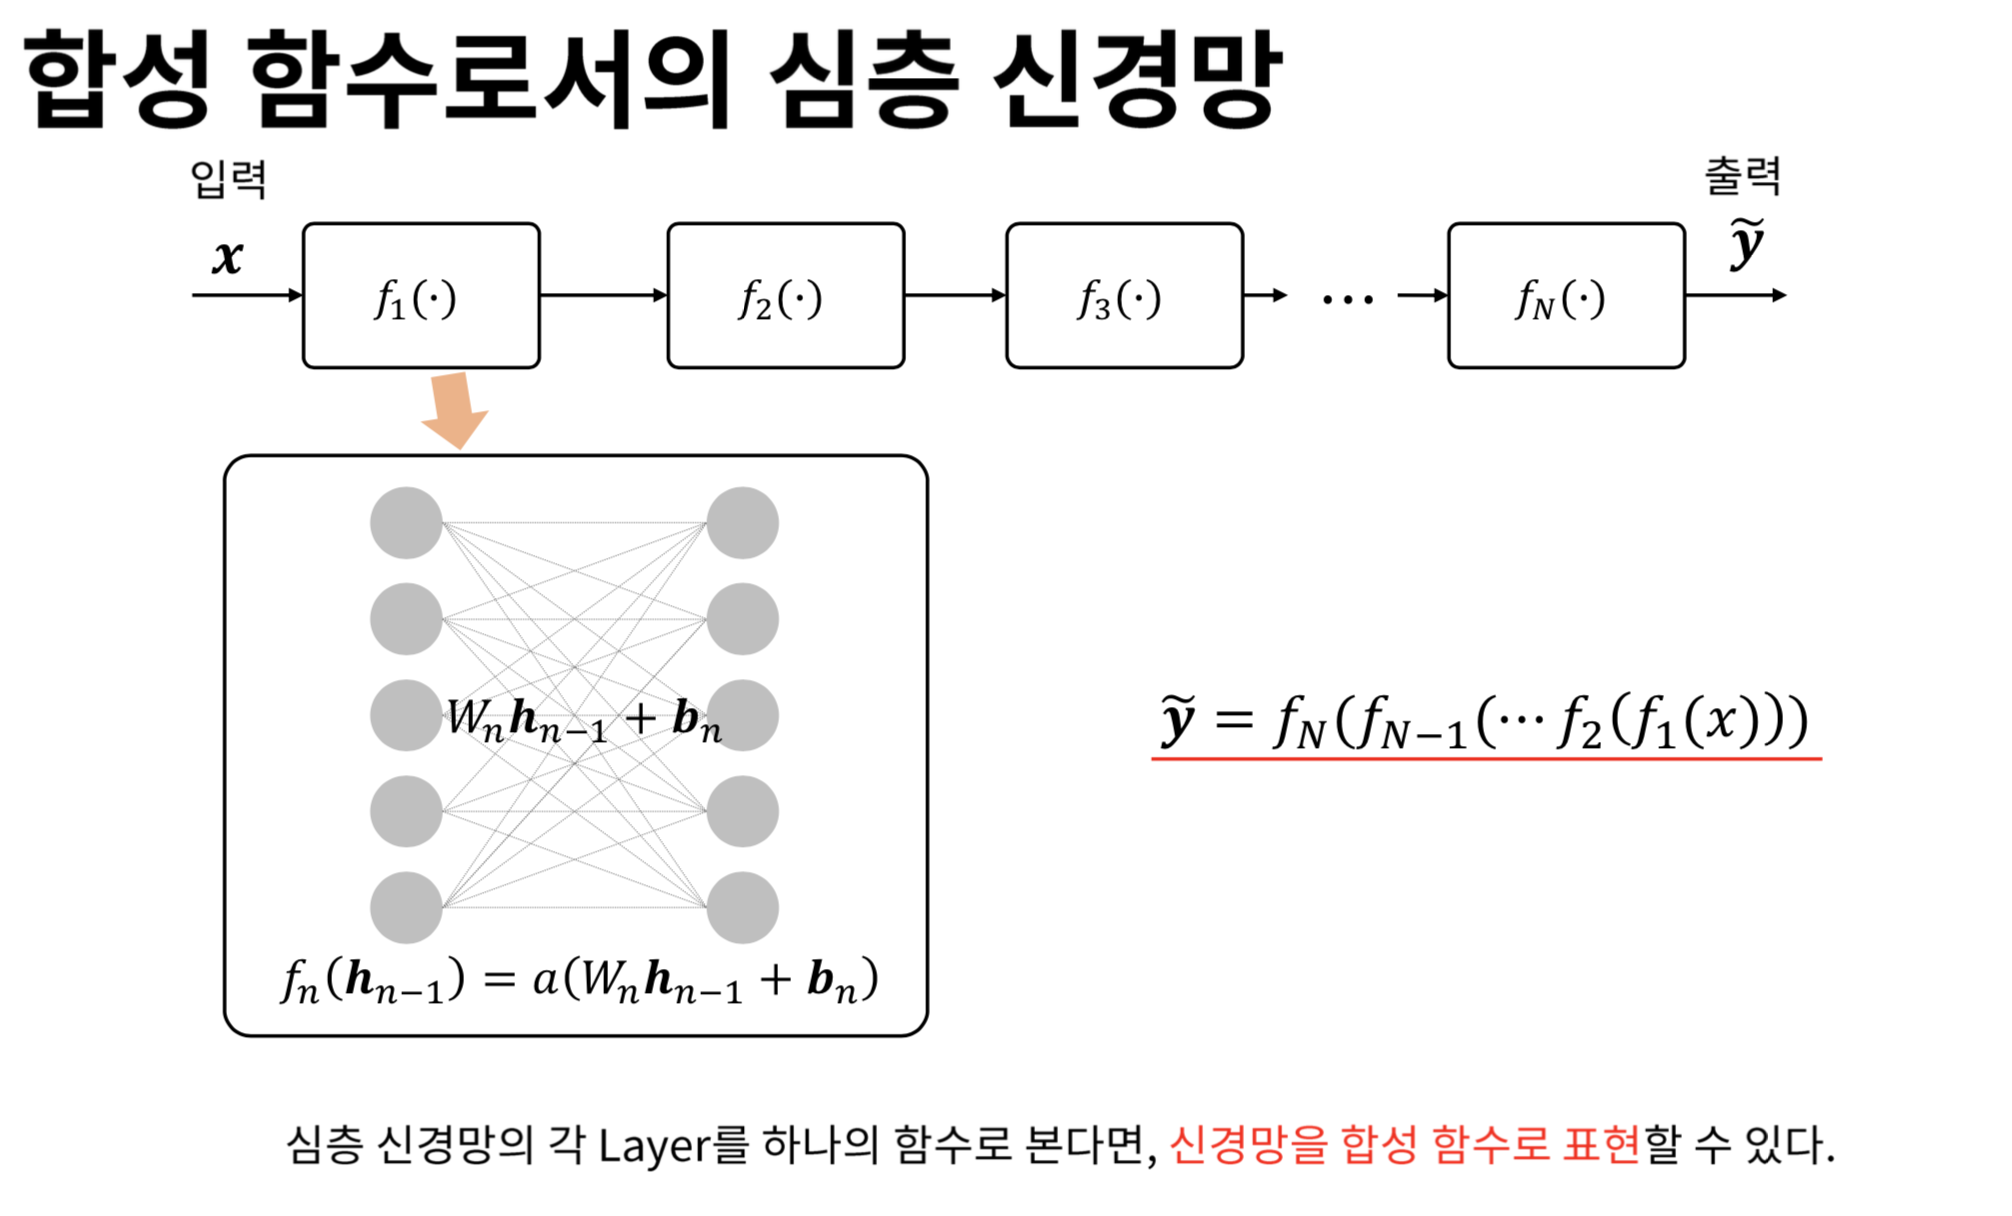


- 미분 가능 연속 함수

  :입력 x를 출력 y로 매핑하는 y=f(x;세타) 파라미터 함수이다
  
  세타: 뉴런의 가중치와 편향을 포함하는 함수의 파라미터
  
  
5. 범용 근사 정리

- n차원 공간의 임의의 연속함수를 근사하는 능력

- 복잡한 경계여도 연속된 곡선으로 표현

- 2계층의순방향 신경망에서 은닉 뉴런 충분히 사용

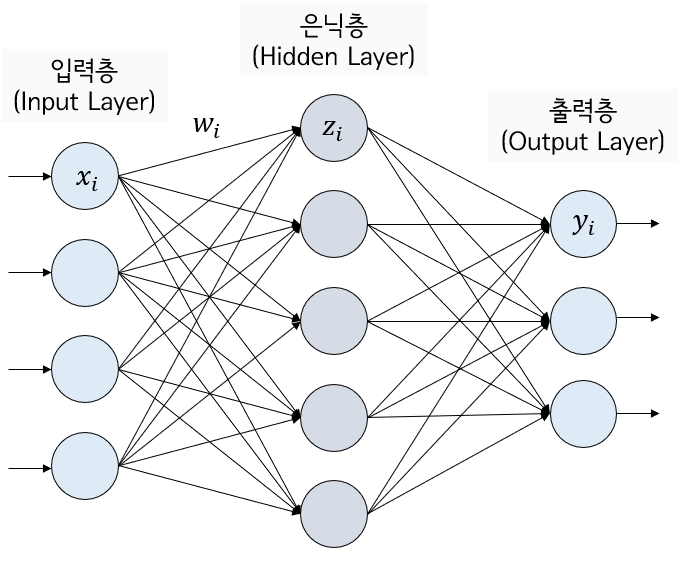

- 검증된 활성 함수 사용

- n차원 공간의 임의의 연속 함수를 원하는 정확도로 근사

-  은닉층을 통해서 복잡한 함수 정확히 근사

- 깊은 신경망으로 확장( 과적합, 모델 성능 저하 방지)

- 은닉 계층의 뉴런 수 제한, 신경망의 깊이 제한X

-->범용 근사기가 된다.



*르베르 적분 가능 함수

- 정의: 불연속이고 적분 가능

- 입력: n차원

- 함수: ReLU사용

- 은닉 계층의 뉴런 수 : n + 4

*비선형 변환 함수

- 함수의 복잡도에 따라 뉴런과 계층 증가 감소를 통해서 모델 확장.(확장성이 뛰어남)


### 순방향의 설계 항목

- 모델의 입력

    - 입력형태
    
- 출력 형태
    
    - 활성함수
    
- 모델 크기

- 활성함수의 종류

- 네트워크  크기

    - 네트워크 깊이: 계층 수
    
    - 네트워크 폭: 계층별 뉴런 수

#### Process 

1. 문제가 정의

2. 데이터와 신경망 모델 종류 선정 

3. 입출력 형태 결정

4. 모델크기와 활성 함수의 종류(모델의 최적 성능 탐색)

5. 하이퍼파라미터 탐색

6. 자동 모델 탐색

7. 최적의 모델 찾기



## 분류와 회귀 문제

### 분류 문제

- 정의: 데이터 클래스 또는 카테고리 예측

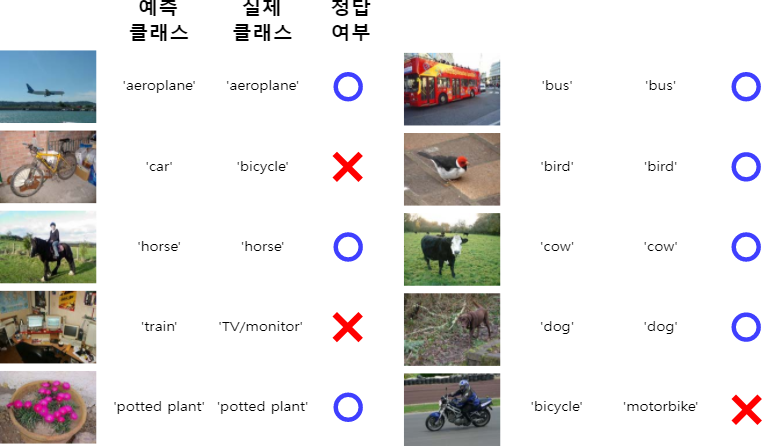

- 종류

    - 이진 분류
    
     : 두 개 클래스로 분류하는 문제
     
     ex)음성/양성, 긍정/부정, 기타 등등
     
     - 다중 분류
     
     : 여러 클래스로 분류하는 문제
     
     ex) 강아지를 보고 품종 판단이나 꽃을 보고 품종(iris)판단
     
     
- 판별 함수

    : 입력데이터가 속한 클래스 예측
    
- 확률 모델
    
    : 입력데이터가 각 클래스에 속할 확률
    
### 회귀 문제

- 정의: 여러 독립 변수와 종속 변수의 관계를 연속 함수 형태로 분석

- 예측값이 숫자형 데이터이다.

- 입력데이터에 대한 함숫값 예측

- 확률분포 예측

- 가우시안 분포

http://norman3.github.io/prml/docs/chapter02/3_1.html

- 예시: 수요 공급량 예측, 집 값 에측,기타등등

## 이진 분류 모델

### 베르누이 분포

: 두 종류의 사건이 발생할 확률을 나타낸다

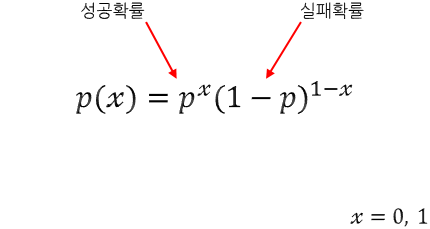

: 두 사건에 대한 확률을 나타내는 막대 그래프로 표현

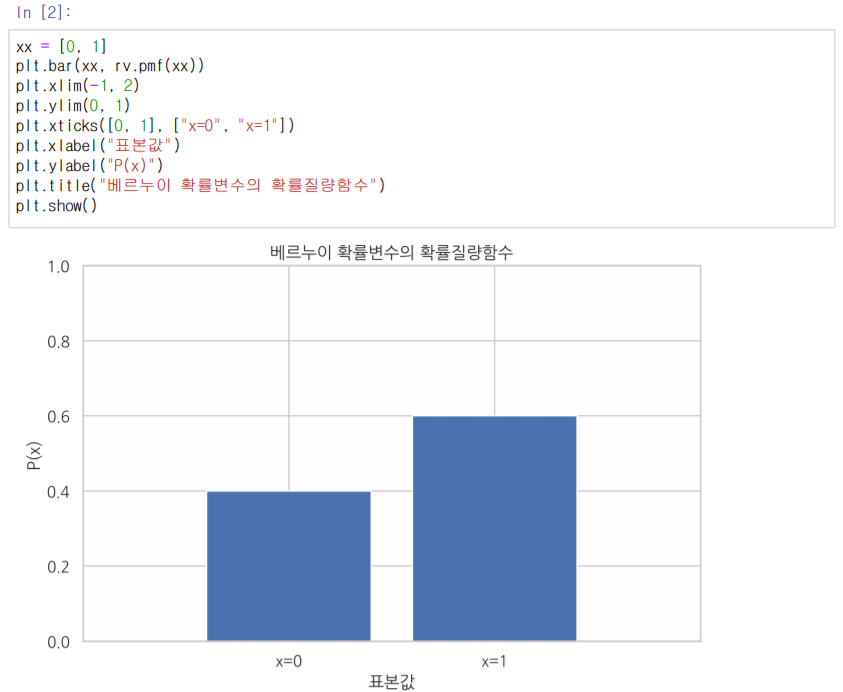


### 확률 모델 정의

- 예시: 이진분류 모델

- 타깃 ti의 확률 분포인 베르누이 분포의 파라미터 예측

- xi입력 시 베르누이 분포의 파라미터에 해당하는 것을 출력

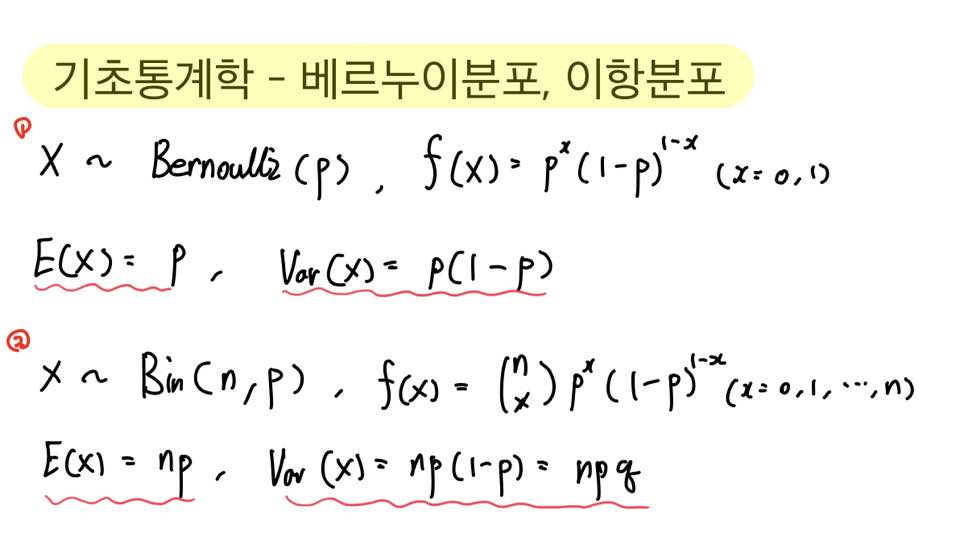

### 출력 계층의 활성 함수

- Covid데이터

- Covid 감염 활률 : M

- Covid 감염 수치: 점수 또는 로짓 예측

-  활성화 함수(sigmoid)를 통해서 파라미터로 변환,

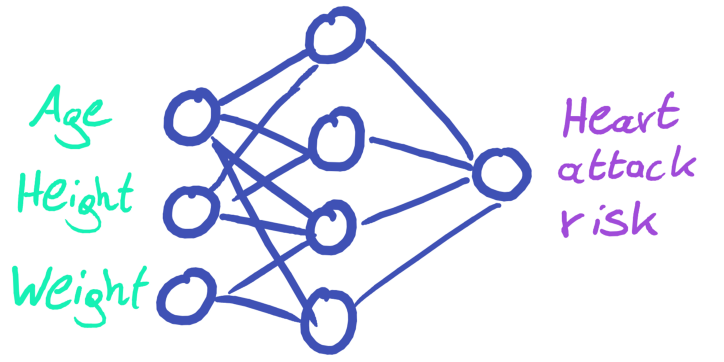

#### 시그모이드 함수

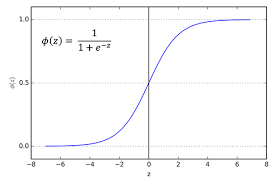

- 함수값 [0,1] 범위

- 값을 고정 범위로 변환하는 스쿼싱 함수

- 신경망의 출력 계층에서 실숫값을 확률로 변환 시 사용



#### 로짓 함수

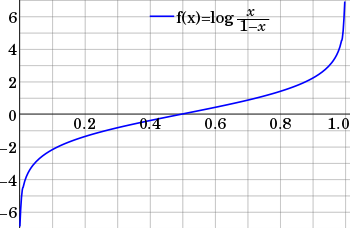

- 정의: 로지스틱 함수의 역함수

- 로짓은 확률이 p이다

-  로그 오즈 : p / (1-p)



### 다중 분류 모델

- 정의: 카테고리 분포를 예측하는 모델로 정의

- 예시: 주사위를 굴렸을때 각 면이 나올 확률 예측

#### 카테고리 분포

- 정의: 여러 종류의 사건이 발생할 확률

- 특징: 베르누이 분포를 일반화한 분포로 K개 사건의 확률 표현

- 갯수별 확률 구하기

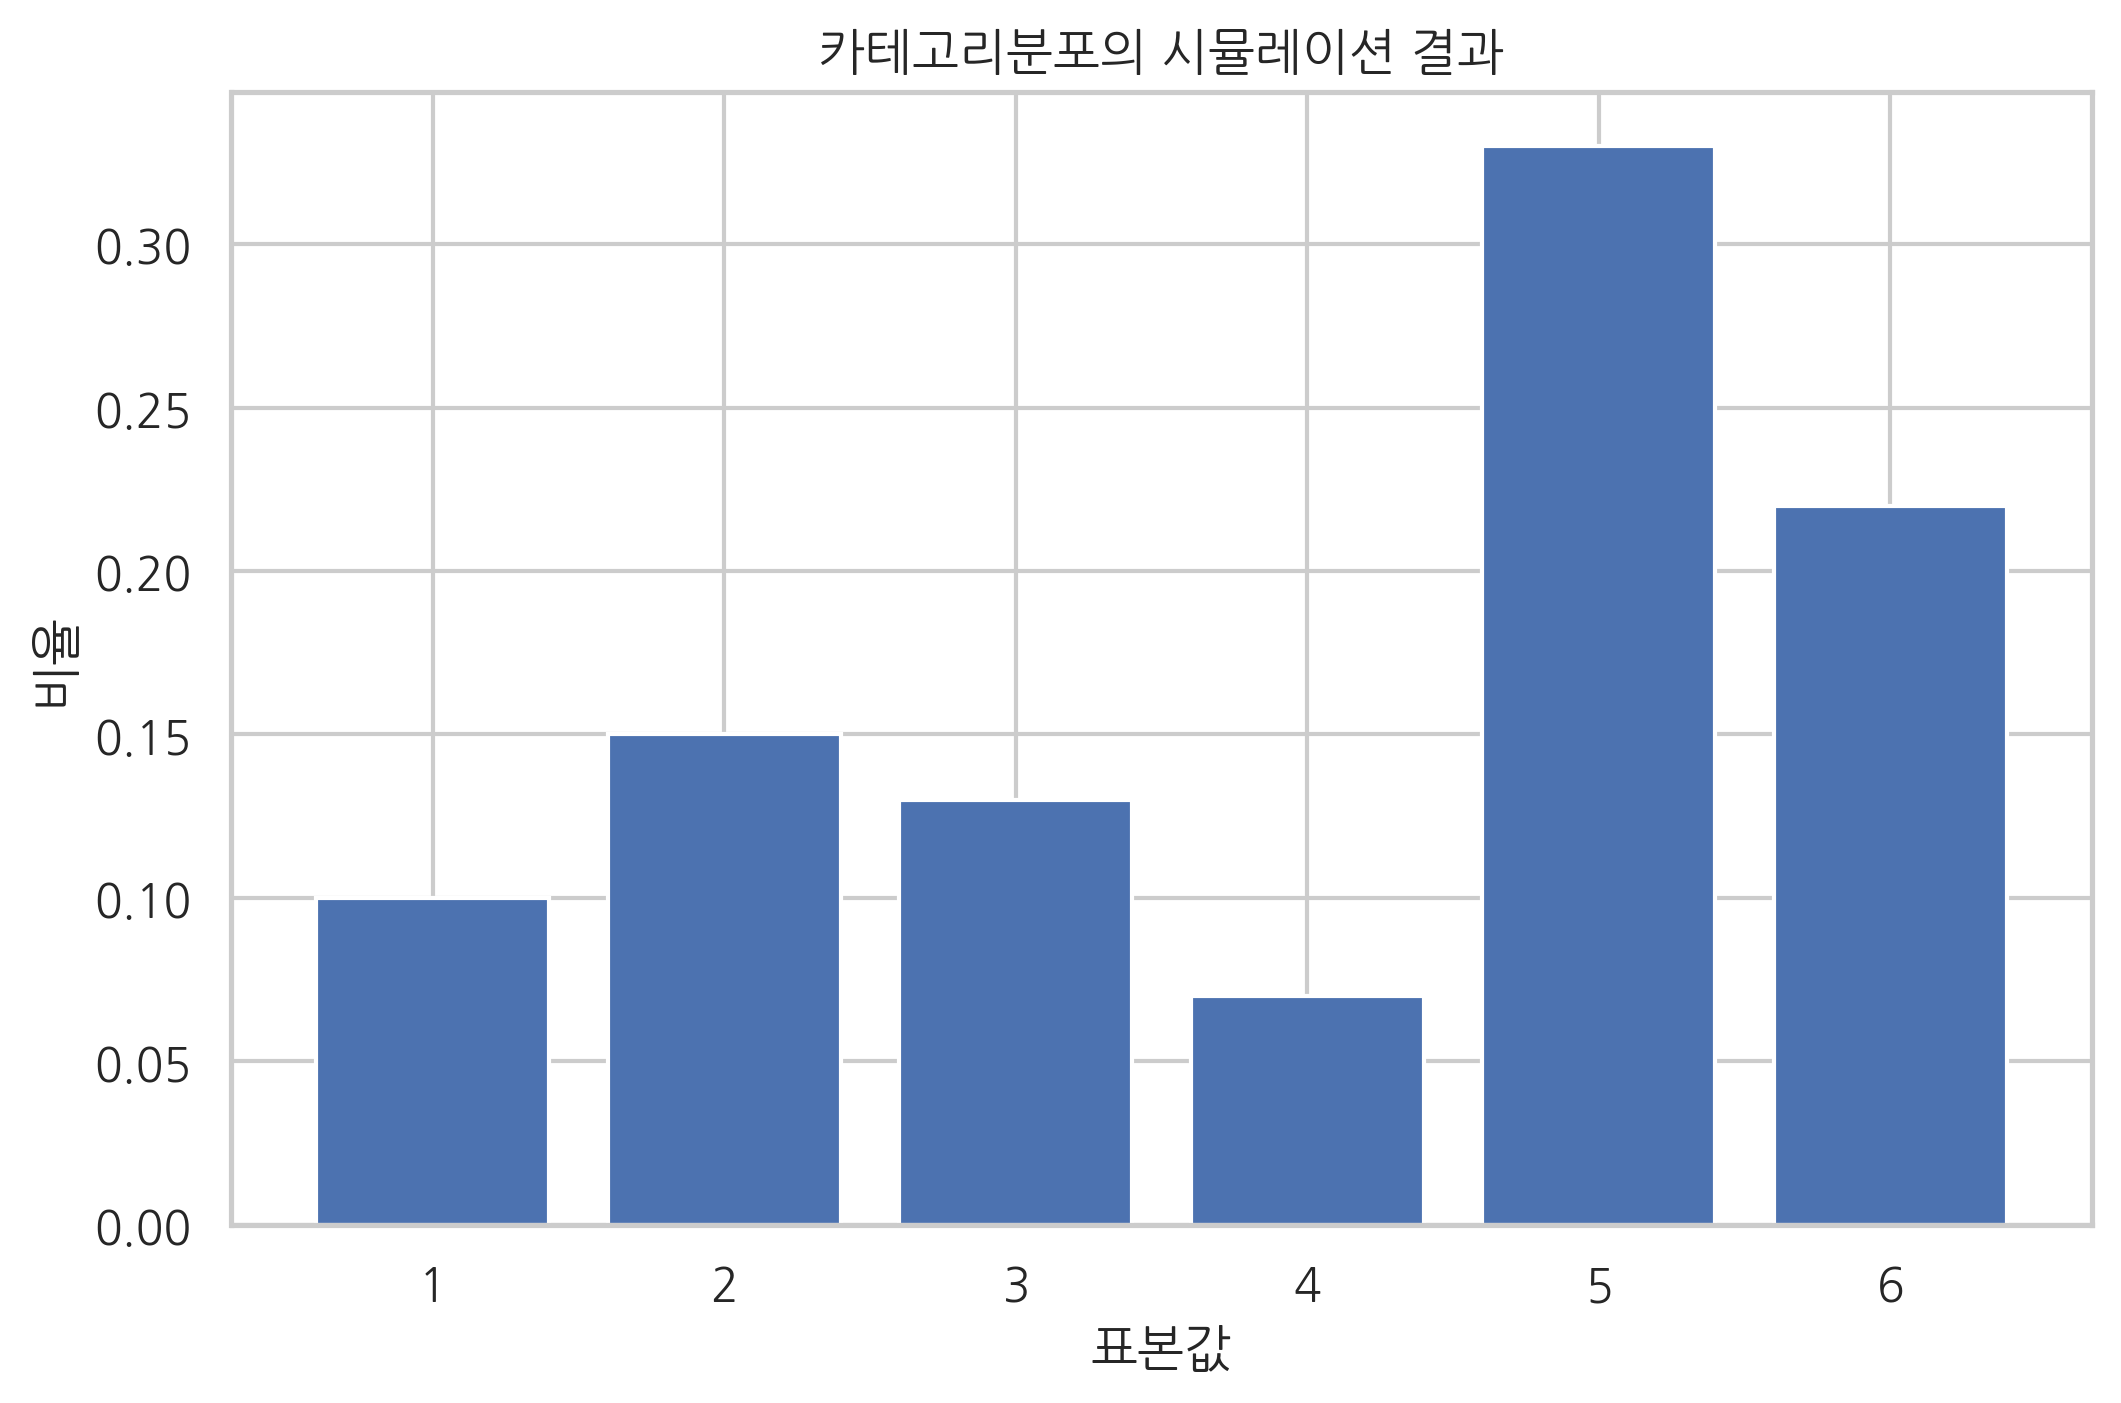


#### 확률 모델 정의

- 타깃 ti의 확률분포인 카테고리 분포의 파라미터 M을 예측하고, 모델이 xi데이터를 입력했을 때, M에 해당하는 것을 출력한다.


#### 출력 계층의 활성함수

- 각 클래스에 속할 수치인 점수 또는 로짓을 실수 벡터로 출력 후 활성함수를 통해서 확률벡터 M으로 변환

- 이때,활성함수는 소프트 맥스 입니다.


    - 실수벡터를 확률 벡터로 변환
    
    -  [0,1] 범위로 변환되고 각 요소의 합은 1이다
    
    - 카테고리확률분포의확률 벡터로 변환할 때 사용
    
    - 시그모이드를 여러 클래스에 대해 일반화 -> 시그모이드 비슷한 함수
    
 
 - 계산과정
 
     - 실수 벡터
     
     - 지수 함수 적용해서 e^y 꼴로 바뀐다
     
     - 정규화한다
     
     - 벡터의 요소는 [0,1] 실수이고 모든 요소의 합은1이다
     

### 회귀 모델

- 정의: 여러 독립 변수와 종속 변수의 관계를 연속함수 형태로 부넉

- 관측 항목 세분화( 독립,종속)

- 관측할 때 발생하는 관측 오차 또는 실험 오차는 가우스 분포로 정의됨

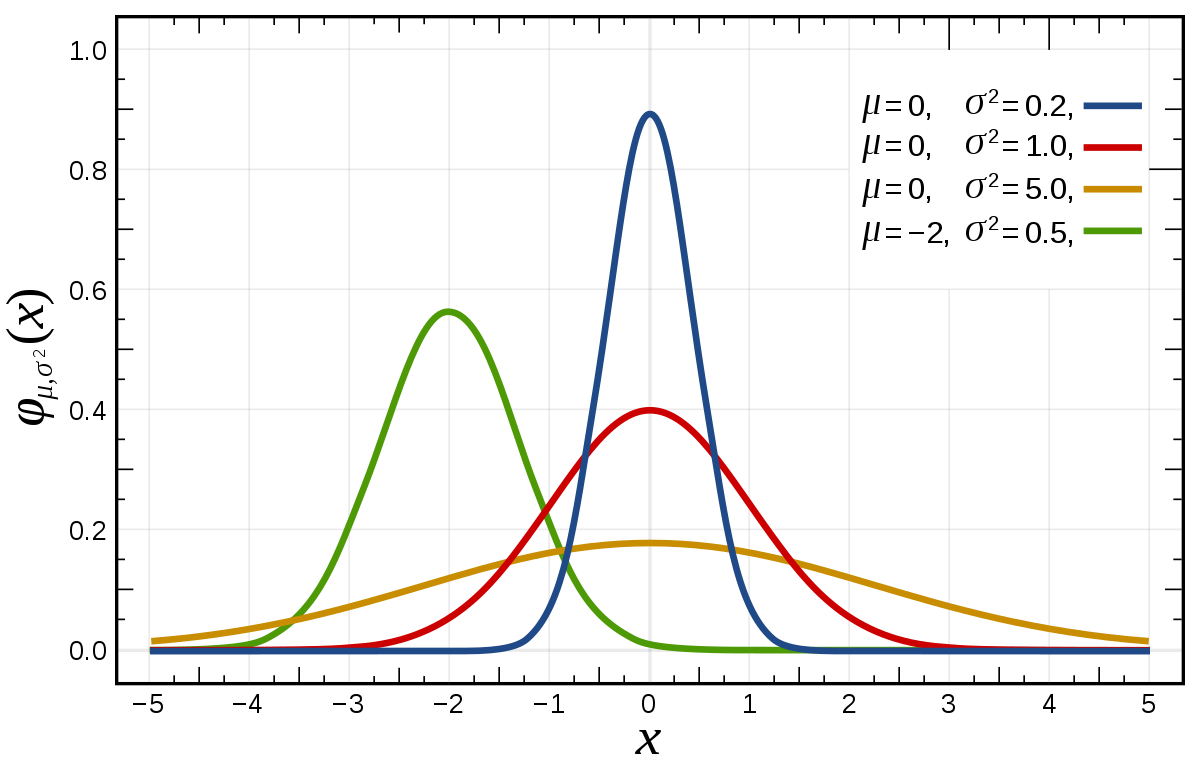

- 중심극한 정리(확률 변수들의 평균이 가까워지는 성질)

#### 회귀모델 정의

- 입력데이터 xi가 독립적으로 샘플링이 됨

- 관측 오차가 더해진 값

- 오차 분산은 정밀도의 역수이다

- 이 모델은 평균만 예측한다.

#### 출력 계층의 활성함수

- 항등함수

: 예측된 평균과 분산이 바뀌면 안되기 때문에 항등함수로 해야함

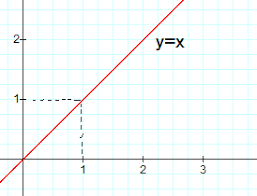

Q1) 완전 연결 계층에서 출력 데이터를 동일하게 받으므로 입력데이터에서 뉴런마다 서로 다른 특징 추출이 무슨 말인가요??

- 입력데이터는 input를 말하는 것인지 아니면 이전 계층 데이터를 말하는 건가요?

- 입력데이터가 달라야하는 이유가 뭔지 궁금합니다.

